# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "4b666e70022373bde25deebb364ed3de"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
import time
index = 0 
p_cities = []
p_lat = []
p_lng=[]
p_temp_max=[]
p_humidity=[]
p_cloudiness=[]
p_windspeed=[]
p_country=[]
p_date=[]

for city in cities:
    url="http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={weather_api_key}&q={city}"
    weather_json=requests.get(query_url).json()
    if "message" in weather_json and weather_json["message"] == "city not found":
        continue
#     print(weather_json)
    p_cities.append(city)
    p_lat.append(weather_json["coord"]["lat"])
    p_lng.append(weather_json["coord"]["lon"])
    p_temp_max.append(weather_json["main"]["temp_max"])
    p_humidity.append(weather_json["main"]["humidity"])
    p_cloudiness.append(weather_json["clouds"]["all"])
    p_windspeed.append(weather_json["wind"]["speed"])
    p_country.append(weather_json["sys"]["country"])
    p_date.append(weather_json["dt"])
    if index % 50 == 0:
        time.sleep(60)
    
    index += 1
   

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {"city":p_cities,
                "lat": p_lat,
                "Lng":p_lng,
                "Max Temp":p_temp_max,
                "Humidity":p_humidity,
                "Cloudiness":p_cloudiness,
                "Wind Speed":p_windspeed,
                "Country":p_country,
                "Date":p_date}
    
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv("weather_data.csv", index=False, header=True)   

In [12]:
weather_data.describe()

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,18.016013,15.356304,284.031707,73.891379,52.639655,3.602138,1.612681e+09
std,33.372085,91.326356,17.407058,19.638976,41.346125,2.728250,2.633681e+02
min,-54.800000,-179.166700,231.480000,11.000000,0.000000,0.160000,1.612680e+09
25%,-9.460025,-63.107975,273.150000,65.000000,2.750000,1.540000,1.612681e+09
50%,20.396000,17.422100,289.820000,78.000000,68.500000,2.815000,1.612681e+09
75%,45.943625,98.132650,297.160000,89.000000,97.000000,4.985000,1.612681e+09
max,78.218600,179.316700,311.150000,100.000000,100.000000,15.430000,1.612681e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# weather_data=weather_data.loc[weather_data['Humidity']<=100]
# weather_data

In [14]:
#  Get the indices of cities that have humidity over 100%.
#df[df['price'].gt(99)].index
weather_data[weather_data['Humidity'].gt(100)].index


Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

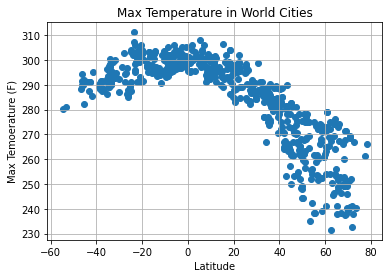

In [16]:
plt.scatter(weather_data["lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities")
plt.ylabel("Max Temoerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/MaxTemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

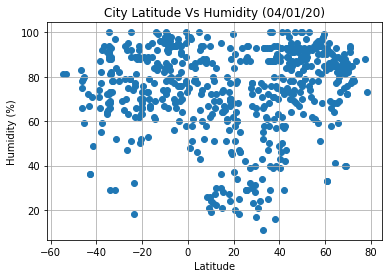

In [17]:
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/HumiditytureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/CloudinesstureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/WindspeedtureInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
weather_data_north=weather_data.loc[weather_data['lat']>0]

x_values = weather_data_north['lat']
y_values = weather_data_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,250),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
weather_data_south=weather_data.loc[weather_data['lat']<=0]

x_values = weather_data_south['lat']
y_values = weather_data_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
weather_data_north=weather_data.loc[weather_data['lat']>0]

x_values = weather_data_north['lat']
y_values = weather_data_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
weather_data_south=weather_data.loc[weather_data['lat']<=0]

x_values = weather_data_south['lat']
y_values = weather_data_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
weather_data_north=weather_data.loc[weather_data['lat']>0]

x_values = weather_data_north['lat']
y_values = weather_data_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
weather_data_south=weather_data.loc[weather_data['lat']<=0]

x_values = weather_data_south['lat']
y_values = weather_data_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
weather_data_north=weather_data.loc[weather_data['lat']>0]

x_values = weather_data_north['lat']
y_values = weather_data_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
weather_data_south=weather_data.loc[weather_data['lat']<=0]

x_values = weather_data_south['lat']
y_values = weather_data_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()